<a href="https://colab.research.google.com/github/asawaribhosale/Sentiment-Based-Product-Recommendation-system/blob/main/SBPRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone : Sentiment Based Product Recommedation System**

### **Problem Statement :**
Ebuss, an e-commerce company, has captured a huge market share in many fields,and it sells the products in various categories such as household essentials,books, personal care products, medicines, cosmetic items, beauty products,electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.A model has been built that will improve the recommendations given to the users given their past reviews and ratings by building a sentiment-based product recommendation system.

**This solution is divided into 4 Tasks:**

1.   Data sourcing and sentiment analysis
2.   Building a recommendation system
3.   Improving the recommendations using the sentiment analysis model
4.   Deploying the end-to-end project with a user interface

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing required libraries


import numpy as np
import pandas as pd
import re, nltk, spacy, string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB, BernoulliNB
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
import pickle
import warnings
warnings.simplefilter("ignore")

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Reading and Loading the Dataset

In [ ]:
reviews_dataset = pd.read_csv('/content/gdrive/MyDrive/Capstone/sample30.csv')

### Analyzing the Dataset

In [ ]:
reviews_dataset.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [ ]:
reviews_dataset.shape

(30000, 15)

In [ ]:
reviews_dataset.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [ ]:
reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [ ]:
reviews_dataset.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [ ]:
# Drop the columns with less than 20% of values
missing_val_threshold = len(reviews_dataset) * .2
reviews_dataset.dropna(thresh = missing_val_threshold, axis = 1, inplace = True)
print("Total number of missing values :")
print(reviews_dataset.isnull().sum())

Total number of missing values :
id                         0
brand                      0
categories                 0
manufacturer             141
name                       0
reviews_date              46
reviews_didPurchase    14068
reviews_doRecommend     2570
reviews_rating             0
reviews_text               0
reviews_title            190
reviews_username          63
user_sentiment             1
dtype: int64


### Visualising Data

In [ ]:
#Taking a glance at the top 5 reviews from the dataset
pd.set_option('max_colwidth', 200)
reviews_dataset['reviews_text'].head(5)

0    i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just c...
1                                                                                                                                             Good flavor. This review was collected as part of a promotion.
2                                                                                                                                                                                               Good flavor.
3    I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, n...
4                                                                       My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I woul

In [ ]:
# Total number of unique users who have written a review
print(f"Total number of unique users who have written a review = {len(reviews_dataset['reviews_username'].unique())} ")

# Total number of unique categories
print(f"Total number of unique categories  = {len(reviews_dataset['categories'].unique())} ")

Total number of unique users who have written a review = 24915 
Total number of unique categories  = 270 


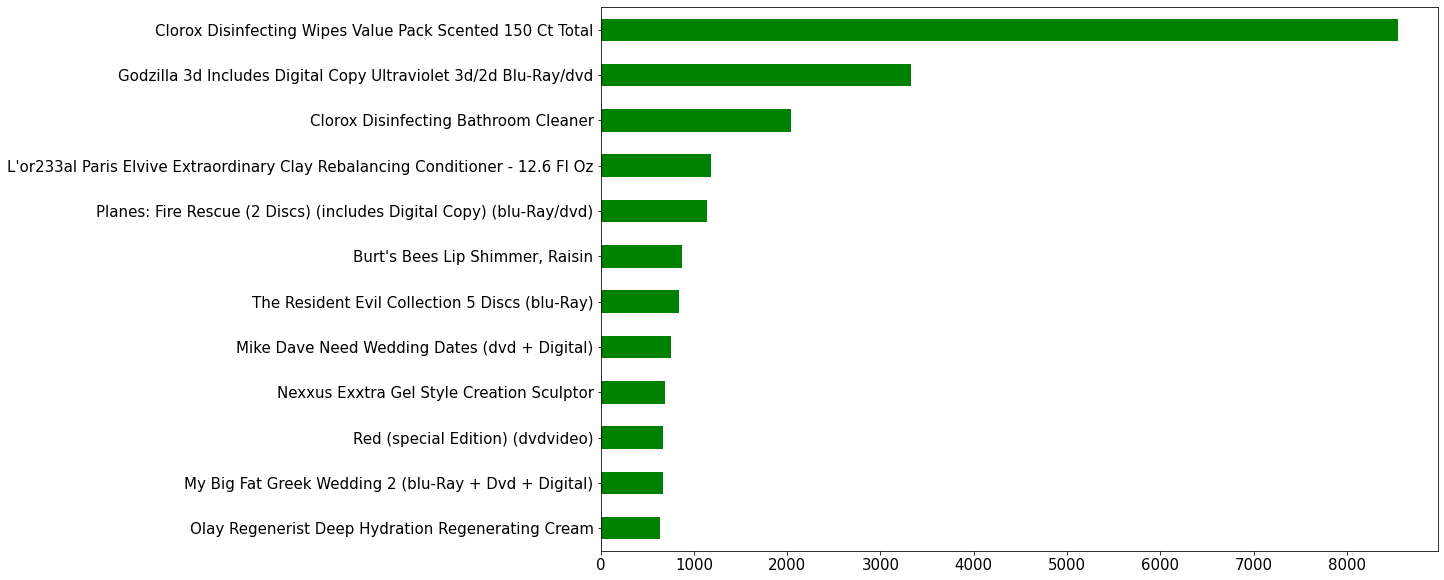

In [ ]:
#Exploring the reviews_df['name'] and finding the product names having maximum frequency

valuecount = reviews_dataset['name'].value_counts()
valuecount[valuecount > 500].plot(kind = 'barh', figsize=[15,10], fontsize=15,color='Green').invert_yaxis()

In [ ]:
#Exploring categories appearing more than 500 times in dataset
valuecount = reviews_dataset['categories'].value_counts()
valuecount[valuecount > 500]

Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners    8545
Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys                                                                                                                                                                                                                                                                                                                                                                                                   3325
Household Chemicals,Household Cleaners,Bath & 

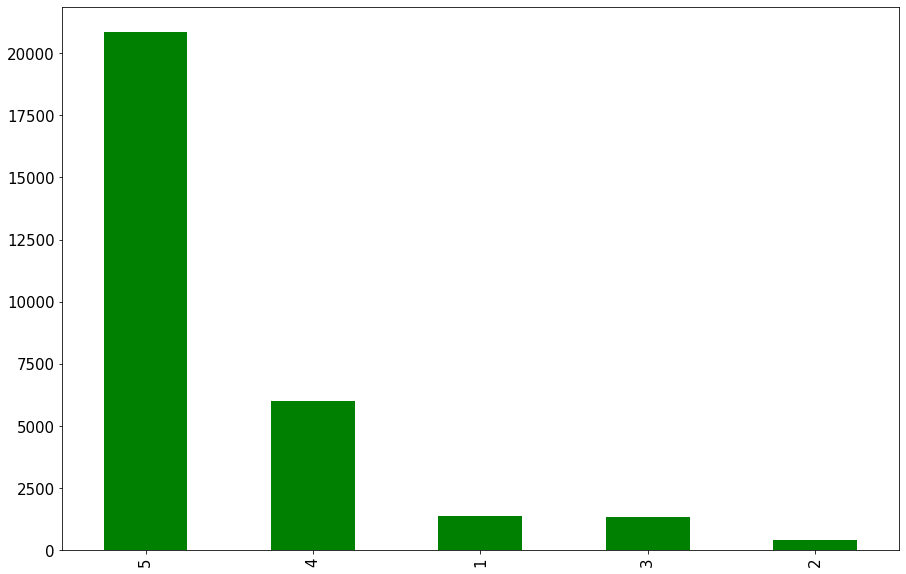

In [ ]:
#Exploring value count for reviews_rating columns
reviews_dataset['reviews_rating'].value_counts().plot(kind = 'bar', figsize=[15,10], fontsize=15,color='Green')

In [ ]:
#Exploring value count for reviews_username columns
reviews_dataset['reviews_username']

0               joshua
1            dorothy w
2            dorothy w
3              rebecca
4            walker557
             ...      
29995       laurasnchz
29996    scarlepadilla
29997       liviasuexo
29998         ktreed95
29999        kcoopxoxo
Name: reviews_username, Length: 30000, dtype: object

 ### Finding missing values & missing value imputation

In [ ]:
reviews_dataset.isnull().sum()

id                         0
brand                      0
categories                 0
manufacturer             141
name                       0
reviews_date              46
reviews_didPurchase    14068
reviews_doRecommend     2570
reviews_rating             0
reviews_text               0
reviews_title            190
reviews_username          63
user_sentiment             1
dtype: int64

In [ ]:
# Imputing missing values for 'reviews_username' column by filling null values with 'others'
reviews_dataset['reviews_username'].fillna('others',inplace=True)

In [ ]:
# Finding missing values for 'user_sentiment' column
print(f" Total number of missing values for 'user_sentiment' column before missing value imputation= {reviews_dataset[reviews_dataset['user_sentiment'].isnull()].shape[0]} ")

# Imputing missing values for 'user_sentiment' column by filling null values with 'Positive' as the manual lookup of respective review text is found to be of Postive sentiment
reviews_dataset['user_sentiment'].fillna('Positive',inplace=True)

# Finding missing values for 'user_sentiment' column after imputation
print(f" Total number of missing values for 'user_sentiment' column after missing value imputation= {reviews_dataset[reviews_dataset['user_sentiment'].isnull()].shape[0]} ")

 Total number of missing values for 'user_sentiment' column before missing value imputation= 1 
 Total number of missing values for 'user_sentiment' column after missing value imputation= 0 


### Text Processing


In [ ]:
#removing hyperlinks and urls
reviews_dataset['reviews'] = reviews_dataset['reviews_text'].apply(lambda x: re.sub(r"http\S+", "", x))
reviews_dataset['reviews']

0        i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just c...
1                                                                                                                                                 Good flavor. This review was collected as part of a promotion.
2                                                                                                                                                                                                   Good flavor.
3        I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, n...
4                                                                           My husband bought this gel for us. The gel caused irritation and it felt like it was bur

In [ ]:
#Perform the Contractions on the reviews.
def contractions(s):
    s = re.sub(r"won’t", "will not",s)
    s = re.sub(r"would’t", "would not",s)
    s = re.sub(r"could’t", "could not",s)
    s = re.sub(r"\’d", " would",s)
    s = re.sub(r"can\’t", "can not",s)
    s = re.sub(r"n\’t", " not", s)
    s= re.sub(r"\’re", " are", s)
    s = re.sub(r"\’s", " is", s)
    s = re.sub(r"\’ll", " will", s) 
    s = re.sub(r"\’t", " not", s)
    s = re.sub(r"\’ve", " have", s)
    s = re.sub(r"\’m", " am", s)
    return s

In [ ]:
reviews_dataset['reviews'] = reviews_dataset['reviews'].apply(contractions)

In [ ]:
#This function takes a document(complaint) as input, preprocesses it and returns preprocessed output 

#stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def preprocess(document):
    'changes document to lower case and removes stopwords, punctuation, numbers and convert words to root form using wordnet_lemmatizer'

    # Make the text lowercase
    document = document.lower()
    
    #Remove punctuation and words containing numbers
    document = re.sub("[^\sA-z]","",document)
    
    # tokenize into words
    words = word_tokenize(document)
    
    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    
    # Lemmatizing the words
    words = [wordnet_lemmatizer.lemmatize(word) for word in words]
    
    # join words to make sentence
    document = " ".join(words)
    
    return document

In [ ]:
#Processing all user reviews from the train dataset
preprocessed_review = [preprocess(review) for review in tqdm(reviews_dataset['reviews'])]
reviews_dataset['preprocessed_review'] = pd.Series(preprocessed_review)

100%|██████████| 30000/30000 [02:27<00:00, 203.01it/s]


In [ ]:
reviews_dataset.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews,preprocessed_review
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just c...,Just Awesome,joshua,Positive,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just c...,love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive,Good flavor. This review was collected as part of a promotion.,good flavor review collected part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,Positive,Good flavor.,good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, n...",Disappointed,rebecca,Negative,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, n...",read review looking buying one couple lubricant ultimately disappointed didnt even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy ...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,husband bought gel u gel caused irritation felt like burning skin wouldnt recommend gel


In [ ]:
# as we've got our reviews processed and in better format, we'll drop the earlier reviews_text, reviews column: 
reviews_dataset = reviews_dataset.drop(['reviews_text','reviews'], axis=1)

**Using Word Clouds for positive and negative reviews**

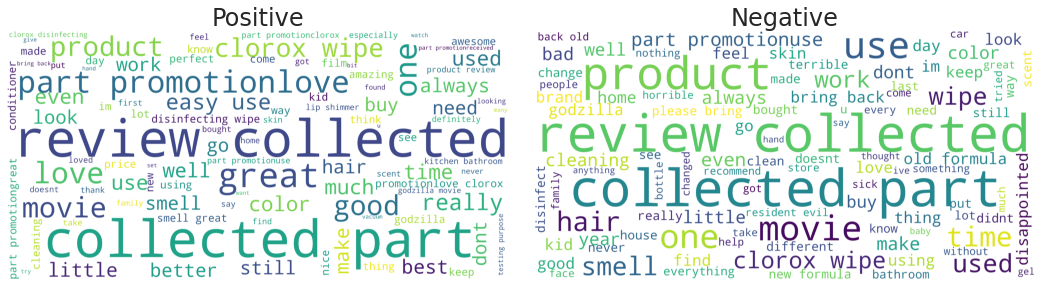

In [ ]:
from wordcloud import WordCloud, STOPWORDS
sns.set(font_scale=2)
plt.figure(figsize = (15,10))

plt.subplot(1, 2, 1)
plt.title('Positive')
positive_reviews=reviews_dataset.loc[reviews_dataset.user_sentiment=='Positive',['preprocessed_review']]
word_cloud_text = ''.join(positive_reviews['preprocessed_review'])
wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.imshow(wordcloud, 
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.tight_layout()


plt.subplot(1, 2, 2)
plt.title('Negative')
negative_reviews=reviews_dataset.loc[reviews_dataset.user_sentiment=='Negative',['preprocessed_review']]

word_cloud_text = ''.join(negative_reviews['preprocessed_review'])

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.imshow(wordcloud, 
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.tight_layout()

### Sentiment Analysis

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [ ]:
#Creating a new feature 'user_sentiment_bool' - All negative sentiments will be marked as "0" and all positive sentiments will be marked as "1"
reviews_dataset['user_sentiment'] = reviews_dataset['user_sentiment'].apply(lambda x: 0 if x == "Negative" else 1)
reviews_dataset.shape

(30000, 13)

In [ ]:
#droping unnecessary columns
data=reviews_dataset[['preprocessed_review','reviews_rating','user_sentiment']]
data

,preprocessed_review,reviews_rating,user_sentiment
0,love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy,5,1
1,good flavor review collected part promotion,5,1
2,good flavor,5,1
3,read review looking buying one couple lubricant ultimately disappointed didnt even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy ...,1,0
4,husband bought gel u gel caused irritation felt like burning skin wouldnt recommend gel,1,0
...,...,...,...
29995,got conditioner influenster try im loving far oily hair use end hair feel amazing soft mess review collected part promotion,5,1
29996,love received review purpose influenster leaf hair feeling fresh smelling great,5,1
29997,first love smell product wash hair smooth easy brush receive product influenster testing purpose opinion review collected part promotion,5,1
29998,received influenster never go back anything else normally dont use conditioner hair oily fine make hair feel heavy doesnt get oily day really fantastic plan buying future review collected part pro...,5,1


In [ ]:
# Lets have a look at the missing value for the column user sentiment
data[data['user_sentiment'].isna()]

,preprocessed_review,reviews_rating,user_sentiment


In [ ]:
# saving data for future purpose
pickle.dump(data, open("data.pkl","wb"))

In [ ]:

from pathlib import Path
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(data['preprocessed_review'])
X = tfidf_vectorizer.transform(data['preprocessed_review'])
y = data['user_sentiment']

# Saving the vocabulary used in tfidf vectorizer as features
pickle.dump(tfidf_vectorizer.vocabulary_, open("features.pkl","wb"))

# Split train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [ ]:
### Class Imbalance check and method to handle it
data.groupby(['user_sentiment']).count()

,preprocessed_review,reviews_rating
user_sentiment,,
0,3367,3367
1,26633,26633


This means we have imbalanced training data set that will definitely affect the accuracy of the predictions. To make this argument valid we will first predict negative and positive reviews by splitting the judged training data and then compare the predicted labels to the human judged labels.

### Handling class imbalance using SMOTE based techniques

In [ ]:
from collections import Counter
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
counter = Counter(y_train)
print("Before", counter)

#oversampling using SMOTE
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print("After", counter)

Before Counter({1: 19957, 0: 2543})
After Counter({1: 19957, 0: 19957})


In [ ]:
X_test_sm, y_test_sm = smote.fit_resample(X_test, y_test)

In [ ]:
#### Creating a utility method for creating confusion matrix and displaying scores
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
def display_score(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    plot_confusion_matrix(classifier, X_test, y_test,include_values=True,values_format='g',cmap=plt.cm.Blues) 
    print(classifier)
    print('\n')
    print('Accuracy is ', accuracy_score(y_test, classifier.predict(X_test)))
    print('Sensitivity is {}'.format(cm[1][1]/sum(cm[1])))
    print('Specificity is {}'.format(cm[0][0]/sum(cm[0])))

In [ ]:
def model(X_train_smote, y_train_smote, X_test_smote, y_test_smote, ml_model, coef_show=1):
    
    clf = ml_model.fit(X_train_smote, y_train_smote)
    clf_pred = clf.predict(X_test_smote)
    accuracy = clf.score(X_test_smote, y_test_smote)
    model_performance = classification_report(y_test_smote, clf_pred)
    validation_pred_proba_grad = clf.predict_proba(X_test_smote)
    roc_auc = roc_auc_score(y_test_smote, validation_pred_proba_grad[:,1])
    print ('accuracy of the model: ', accuracy)
    print('')
    print(model_performance)
    print('')
    print('ROC_AUC score: ', roc_auc)
    
    if coef_show == 1:
        w = tfidf_vectorizer.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('Top 10 positive features (variables)')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('Top 10 negative features (variables)')        
        print(coeff_df.tail(20).to_string(index=False))
    
    return clf

**Logistic Regression**

In [ ]:
#logistic regression
logistic = model(X_train_sm, y_train_sm, X_test_sm, y_test_sm, LogisticRegression())

accuracy of the model:  0.886833433193529

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      6676
           1       0.85      0.94      0.89      6676

    accuracy                           0.89     13352
   macro avg       0.89      0.89      0.89     13352
weighted avg       0.89      0.89      0.89     13352


ROC_AUC score:  0.9665175838906419

Top 10 positive features (variables)
     Word  Coefficient
    great    21.678107
     love    15.062114
     good    13.555073
     best    12.043525
     easy    11.230153
    clean    11.147730
    loved     8.060576
   better     7.994938
  awesome     7.291903
     nice     7.208162
  perfect     6.912055
excellent     6.533369
     many     6.468330
  amazing     6.300304
   really     6.196153
 favorite     5.699819
  enjoyed     5.524897
wonderful     5.430471
     free     5.200916
 easy use     5.187184

Top 10 negative features (variables)
         Word  Coefficient
        

LogisticRegression()


Accuracy is  0.9249333333333334
Sensitivity is 0.9441282204913122
Specificity is 0.7694174757281553


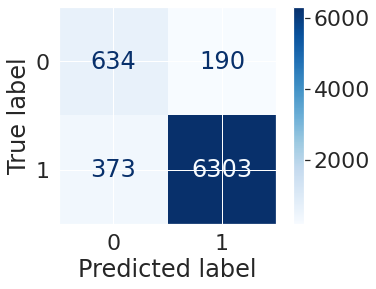

In [ ]:
display_score(logistic)

In [ ]:
# saving the model
pickle.dump(logistic, open('logistic_model.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open("tfidf.pkl", "wb"))

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [ ]:
Multinomialnaive = model(X_train_sm, y_train_sm, X_test_sm, y_test_sm, MultinomialNB())

accuracy of the model:  0.8095416417016177

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      6676
           1       0.76      0.91      0.83      6676

    accuracy                           0.81     13352
   macro avg       0.82      0.81      0.81     13352
weighted avg       0.82      0.81      0.81     13352


ROC_AUC score:  0.9196244715157916

Top 10 positive features (variables)
            Word  Coefficient
           great    -6.446282
            love    -6.530867
           movie    -6.616813
            part    -6.639797
          review    -6.641487
       promotion    -6.657230
  collected part    -6.657396
  part promotion    -6.657396
review collected    -6.657396
       collected    -6.657456
         product    -6.685722
             use    -6.756740
            wipe    -6.821694
           clean    -6.877968
            good    -6.919860
          clorox    -7.094272
            easy    -7.196210
           smel

MultinomialNB()


Accuracy is  0.8822666666666666
Sensitivity is 0.9102756141402037
Specificity is 0.6553398058252428


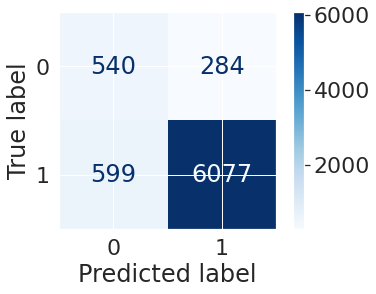

In [ ]:
display_score(Multinomialnaive)

In [ ]:
Bernoullinaive = model(X_train_sm, y_train_sm, X_test_sm, y_test_sm, BernoulliNB())


accuracy of the model:  0.6766776512881966

              precision    recall  f1-score   support

           0       0.95      0.37      0.54      6676
           1       0.61      0.98      0.75      6676

    accuracy                           0.68     13352
   macro avg       0.78      0.68      0.64     13352
weighted avg       0.78      0.68      0.64     13352


ROC_AUC score:  0.8986382029508597

Top 10 positive features (variables)
            Word  Coefficient
            part    -1.179507
          review    -1.184572
       promotion    -1.213993
       collected    -1.214162
  collected part    -1.214331
  part promotion    -1.214331
review collected    -1.214331
           great    -1.246918
            love    -1.274133
         product    -1.419662
             use    -1.484947
           movie    -1.651076
            wipe    -1.766675
           clean    -1.777285
            good    -1.930695
          clorox    -2.069421
            like    -2.099635
            eas

BernoulliNB()


Accuracy is  0.8992
Sensitivity is 0.9784301977231875
Specificity is 0.25728155339805825


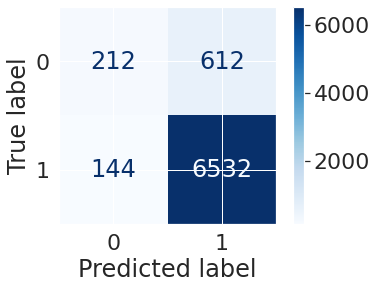

In [ ]:
display_score(Bernoullinaive)

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rndm_forest = RandomForestClassifier(n_estimators=100, max_depth=20, max_features=100, random_state=31, oob_score=True)

randomforest = model(X_train_sm, y_train_sm, X_test_sm, y_test_sm, rndm_forest, coef_show=0)

accuracy of the model:  0.7318004793289394

              precision    recall  f1-score   support

           0       0.90      0.52      0.66      6676
           1       0.66      0.94      0.78      6676

    accuracy                           0.73     13352
   macro avg       0.78      0.73      0.72     13352
weighted avg       0.78      0.73      0.72     13352


ROC_AUC score:  0.9034412637167164


RandomForestClassifier(max_depth=20, max_features=100, oob_score=True,
                       random_state=31)


Accuracy is  0.8729333333333333
Sensitivity is 0.9406830437387658
Specificity is 0.32402912621359226


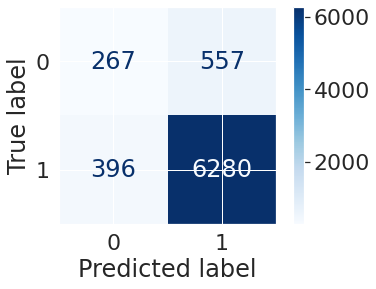

In [ ]:
display_score(randomforest)

**XGBoost Classifier**

In [ ]:
#### Fitting a XGBoost classifier without any hyperparameter tuning
# importing libraries for XGBoost classifier
import xgboost as xgb
from xgboost import XGBClassifier

final_xgb = XGBClassifier(booster='gbtree')


In [ ]:
finalxgb = model(X_train_sm, y_train_sm, X_test_sm, y_test_sm, final_xgb, coef_show=0)

accuracy of the model:  0.8767974835230677

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      6676
           1       0.92      0.82      0.87      6676

    accuracy                           0.88     13352
   macro avg       0.88      0.88      0.88     13352
weighted avg       0.88      0.88      0.88     13352


ROC_AUC score:  0.9500971258572332


XGBClassifier()


Accuracy is  0.8276
Sensitivity is 0.8214499700419413
Specificity is 0.8774271844660194


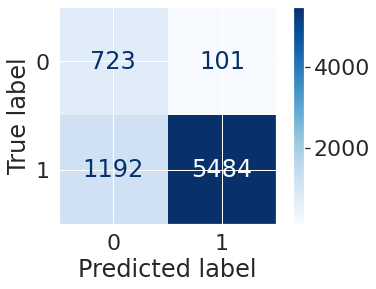

In [ ]:
#### Displaying Confusion matrix Scores
#Test data performance metrics
display_score(finalxgb)

In [ ]:
#### Fitting a XGBoost classifier with various custom hyperparameters.

param_grid = {'learning_rate': [0.001, 0.01], 'max_depth':[ 5, 10],  'n_estimators':[1, 3]}

final_xgb = XGBClassifier(booster='gbtree')

# set up GridSearchCV()
xgb_tuned = GridSearchCV(estimator = final_xgb, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv =3, 
                        verbose = 1,
                        return_train_score=True)

xgb_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.001, 0.01], 'max_depth': [5, 10],
                         'n_estimators': [1, 3]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# print best hyperparameters
print("Best AUC-ROC Score on train data: ", xgb_tuned.best_score_)
print("Best hyperparameters: ", xgb_tuned.best_params_)

Best AUC-ROC Score on train data:  0.8709770683487038
Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 3}


GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.001, 0.01], 'max_depth': [5, 10],
                         'n_estimators': [1, 3]},
             return_train_score=True, scoring='roc_auc', verbose=1)


Accuracy is  0.7654666666666666
Sensitivity is 0.7526962252846016
Specificity is 0.8689320388349514


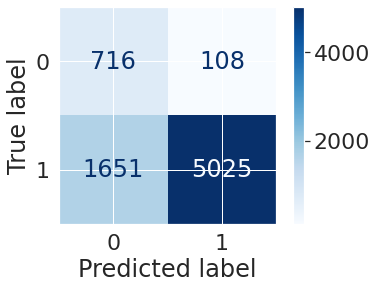

In [ ]:
display_score(xgb_tuned)

** Models Comparison for the selection**

In [ ]:
results = {('LR'):[0.92 , 0.92 , 0.85], ('NB M'):[0.86, 0.89, 60], ('NB B'):[0.90, 0.97, 0.29] , ('XGB'):[0.82, 0.81, 0.87], ('XGB Tuned'):[0.76, 0.75 , 0.88],
 ('RF'):[0.85 , 0.91,0.33]}
pd.DataFrame(results, index=['Accuracy', 'Sensitivity', 'Specificity'])

,LR,NB M,NB B,XGB,XGB Tuned,RF
Accuracy,0.92,0.86,0.90,0.82,0.76,0.85
Sensitivity,0.92,0.89,0.97,0.81,0.75,0.91
Specificity,0.85,60.00,0.29,0.87,0.88,0.33


#### After Trainning multiple models we can say that Logistic Regression gives best result. 

### **Building Recomendation System**
*   User based recommendation
*   User based prediction & evaluation
*   Item based recommendation
*   Item based prediction & evaluation

##### Different Approaches to develop Recommendation System -


1.   Demographich based Recommendation System
2.   Content Based Recommendation System
3.   Collaborative filtering Recommendation System

In [ ]:
# Importing Libraries
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
# Read the dataset 
ratings = pd.read_csv('/content/gdrive/MyDrive/Capstone/sample30.csv')

In [ ]:
ratings= ratings[ratings['reviews_username'].isnull()== False]
ratings.reset_index(drop=True)
print(len(ratings))
ratings.head()

29937


,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just c...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, n...",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


In [ ]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings, test_size=0.30, random_state=12)
print(train.shape)
print(test.shape)

(20955, 15)
(8982, 15)


In [ ]:
ratings.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [ ]:
# Pivot the train ratings' dataset into matrix format in which columns are movies and the rows are user IDs.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(0)

df_pivot.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating dummy train & dummy test dataset

These dataset will be used for prediction

*   Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction. The products not rated by user is marked as 1 for prediction in dummy train dataset.
*   Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.





In [ ]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

dummy_train.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
27729,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, ...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),2014-12-12T00:00:00.000Z,NaN,True,5,Picks up right where the first one left off. Great story and the kids will be sure to love it.,Great pick for the kids,NaN,NaN,stevieboy23,Positive
17120,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown Rice,Meal Solutions, Grains & Pasta,Grains & Rice,Grocery & Gourmet Food,Dried Beans, Grains & Rice,Brown",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2013-01-02T00:00:00.000Z,NaN,NaN,5,Cook it with broth or a little salt and pepper and BAM! it does take a while to cook about 45 min. What I did was slow cook chicken and about 1hour left I added the rice or bake the chicken with t...,Not bad and healthy,NaN,NaN,byo.kelly,Negative
22028,AVpfnRuSilAPnD_xfB8l,Yes to Grapefruit,"Personal Care,Bath, Shower & Soap,Body Wash & Cleanser,Bath & Body,Body Wash & Cleansers,Beauty,Bath & Body Care,Scrubs & Body Treatments,Body Scrubs","Yes To, Inc",Yes To Grapefruit Rejuvenating Body Wash,2017-08-11T00:00:00.000Z,True,NaN,3,The grapefruit scent is not as strong as I would have liked. Great lather. This review was collected as part of a promotion.,A Little Disappointed,NaN,NaN,linda h,Positive
16308,AVpf63aJLJeJML43F__Q,Burt's Bees,"Personal Care,Makeup,Lipstick, Lip Gloss, & Lip Balm,Lip Gloss,Beauty,Lips,Beauty & Personal Care,Skin Care,Lip Care,Lip Balms & Treatments",Burt's Bees,"Burt's Bees Lip Shimmer, Raisin",2013-08-02T00:00:00.000Z,False,True,5,Your current pink pallet does not suit me. My daughter and I are crazy for cocoa. Obsessed with this lip color. I look in every town I visit hoping to find some out-of-the-way stash. When will we ...,Crazy for Cocoa,NaN,NaN,cocoacrazy,Negative
19457,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpos...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2015-04-30T00:00:00.000Z,False,True,5,"I love Clorox wipes! they are so convenient, they disinfect, and leave the surface spotless! bu-bye germs This review was collected as part of a promotion.","fresh, clean, convenient",NaN,NaN,vanessavast,Positive


In [ ]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [ ]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(1)

In [ ]:
dummy_train.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### **Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors

#### **Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.

#### **User Similarity Matrix**

In [ ]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.        0.        0.        ... 0.        0.        0.       ]
 [0.        1.        0.        ... 0.        0.9486833 0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.        0.9486833 0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]


In [ ]:
user_correlation.shape


(18188, 18188)

### **Using adjusted Cosine**

Here, we are not removing the NaN values and calculating the mean only for the products rated by the user

In [ ]:
# Create a user-product matrix.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

In [ ]:
df_pivot.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the rating of the product for each user around 0 mean

In [ ]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

df_subtracted.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding cosine similarity


In [ ]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
user_correlation.shape

(18188, 18188)

####**Prediction - User User**

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0

In [ ]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75592895, 0.        , ..., 0.        , 0.42640143,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
user_predicted_ratings.shape

(18188, 251)

Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero.

In [ ]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head(10)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
00sab00,0.0,0.755929,0.0,0.0,0.0,0.0,0.0,0.0,1.020621,0.0,...,2.703103,0.0,0.000000,0.0,1.597933,0.0,0.0,0.000000,0.426401,0.0
01impala,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
02dakota,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
02deuce,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
08dallas,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1.11E+24,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
10ten,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
11111111aaaaaaaaaaaaaaaaa,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


### Finding the top 20 recommendation for the user

In [ ]:
# Take the user ID as input.
user_input = input("Enter your user name")
print(f"User name input = {user_input} ")

Enter your user namerebecca
User name input = rebecca 


In [ ]:
top20_recommendations_for_user = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
top20_recommendations_for_user

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                  27.114273
Mike Dave Need Wedding Dates (dvd + Digital)                                                     14.612481
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                                             10.450759
Red (special Edition) (dvdvideo)                                                                  6.626790
Coty Airspun Face Powder, Translucent Extra Coverage                                              4.921332
Clorox Disinfecting Bathroom Cleaner                                                              4.917849
The Resident Evil Collection 5 Discs (blu-Ray)                                                    4.915438
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack                   4.249509
Bisquick Original Pancake And Baking Mix - 40oz                                                   3.530783
Jason Aldean - They Don't Know  

### Evaluation - User User

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the user insead of predicting it for the movie not rated by the user.

In [ ]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
print(f"common shape = {common.shape} \n")
common.head(3)

common shape = (1984, 15) 



,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
1587,AVpe31o71cnluZ0-YrSD,Warner Bros.,"Movies, Music & Books,Movies,Comedy,Movies & TV,Misc,Instawatch Movies By VUDU,Shop Instawatch,Movies & Music,Movies & TV Shows,Instawatch,Electronics, Tech Toys, Movies, Music,DVDs,See ALL DVDs",TIME WARNER,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),2016-03-18T00:00:00.000Z,NaN,True,4,Not my favorite Depp movie but if you are a fan you have to watch it,Johnny Depp,NaN,NaN,karv,Positive
17823,AVpfBU2S1cnluZ0-cJsO,Power Crunch,"Food,Packaged Foods,Snacks,Energy Bars,Health,Protein & Fitness,Protein Bars,Active Nutrition,Sports & Outdoors,Outdoor Sports,Bikes,Bike Accessories,Bars,Breakfast Bars",BNRG,Power Crunch Protein Energy Bar Peanut Butter Creme Original,2016-11-20T00:00:00.000Z,True,False,3,If you had a peanut butter flavored toothpaste that you let dry out then ate it the taste is better than this meow but at least my wife enjoys them,Yucky,NaN,NaN,jerry,Positive
3964,AVpe8gsILJeJML43y6Ed,Pendaflex,"School & Office Supplies,Filing,Files,File Folders,Office,Office Supplies,Office Organization,Filing and Folders,All Folders and Filing,Project Folders,Office Products,Filing Products,Folders,elec...",Esselte Corporation,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",2013-01-23T07:00:00.000Z,NaN,NaN,4,This type of file is handy for receipts and small documents. I'm using one for a trip on which I don't want to loose any little things I'll need to submit later.,Handy File Product!,NaN,NaN,none,Positive


In [ ]:
# convert into the user-movie matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [ ]:
common_user_based_matrix.head()

name,100:Complete First Season (blu-Ray),"42 Dual Drop Leaf Table with 2 Madrid Chairs""",Alex Cross (dvdvideo),Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23jen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37f5p,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
print(f"user_correlation_df shape = {user_correlation_df.shape} \n")
print(f"df_subtracted shape = {df_subtracted.shape} \n")
df_subtracted.head(1)

user_correlation_df shape = (18188, 18188) 

df_subtracted shape = (18188, 251) 



name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18178,18179,18180,18181,18182,18183,18184,18185,18186,18187
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
list_name = common.reviews_username.tolist()
print(f"Length of list_name list = {len(list_name)} \n ")

user_correlation_df.columns = df_subtracted.index.tolist()
print(f"user_correlation_df shape = {user_correlation_df.shape} \n ")

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]
print(f"user_correlation_df_1 shape = {user_correlation_df_1.shape} \n")

user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]
print(f"user_correlation_df_2 shape = {user_correlation_df_2.shape} \n")

user_correlation_df_3 = user_correlation_df_2.T
print(f"user_correlation_df_3 shape = {user_correlation_df_3.shape} \n")

Length of list_name list = 1984 
 
user_correlation_df shape = (18188, 18188) 
 
user_correlation_df_1 shape = (1675, 18188) 

user_correlation_df_2 shape = (1675, 1675) 

user_correlation_df_3 shape = (1675, 1675) 



In [ ]:
user_correlation_df_3.shape

(1675, 1675)

In [ ]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[6.79412342, 0.        , 0.        , ..., 2.64220059, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [8.76776695, 0.        , 0.79056942, ..., 2.66667487, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [ ]:

common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)
print(f"common_user_predicted_ratings shape = {common_user_predicted_ratings.shape} \n")
common_user_predicted_ratings.head(3)

common_user_predicted_ratings shape = (1675, 124) 



name,100:Complete First Season (blu-Ray),"42 Dual Drop Leaf Table with 2 Madrid Chairs""",Alex Cross (dvdvideo),Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23jen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.589725958923943


## Item Based Similarity

In [ ]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,08dallas,1.11E+24,10ten,11111111aaaaaaaaaaaaaaaaa,1234,...,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zyiah4,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the movie rating for each movie for using the Adujsted Cosine



In [ ]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T
df_subtracted.head()

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,08dallas,1.11E+24,10ten,11111111aaaaaaaaaaaaaaaaa,1234,...,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zyiah4,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,0.260204,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity using pairwise distances approach



In [ ]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.          0.         ... -0.00602265  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.00602265  0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


In [ ]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Prediction - Item Item

In [ ]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02291604, 0.        , ..., 0.        , 0.00427996,
        0.        ],
       [0.        , 0.02637475, 0.        , ..., 0.        , 0.0035818 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02166431, 0.        , ..., 0.        , 0.00713326,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
item_predicted_ratings.shape

(18188, 251)

Filtering the rating only for the Product not rated by the user for recommendation


In [ ]:

item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
print(f"item_final_rating shape = {item_final_rating.shape} \n")
item_final_rating.head(3)

item_final_rating shape = (18188, 251) 



name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
00sab00,0.0,0.022916,0.0,0.0,0.0,0.0,0.0,0.0,0.034402,0.0,...,0.0,0.0,0.0,0.000000,0.016129,0.0,0.0,0.0,0.004280,0.0
01impala,0.0,0.026375,0.0,0.0,0.0,0.0,0.0,0.0,0.010183,0.0,...,0.0,0.0,0.0,0.005066,0.004422,0.0,0.0,0.0,0.003582,0.0


In [ ]:
# save the model to disk
filename = 'item_rating.pkl'
pickle.dump(item_final_rating, open(filename, 'wb'))

### Finding the top 20 recommendation for the user


In [ ]:

# Take the user  as input
user_input = input("Enter your user name")
print(f"user input = {user_input} \n")

Enter your user namedorothy w
user input = dorothy w 



In [ ]:
# Recommending the Top 5 products to the user.
top20_recommendations_for_user_ITEMITEM = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
top20_recommendations_for_user_ITEMITEM

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                          0.0
Plano Mini-Magnum 13-Compartment Tackle Box                                            0.0
Olay Moisturizing Lotion For Sensitive Skin                                            0.0
Olay Regenerist Deep Hydration Regenerating Cream                                      0.0
Olivella Bar Soap - 3.52 Oz                                                            0.0
Orajel Maximum Strength Toothache Pain Relief Liquid                                   0.0
Pacific Natural Foods Organic Beef Broth                                               0.0
Pantene Color Preserve Volume Shampoo, 25.4oz                                          0.0
Pantene Pro-V Expert Collection Age Defy Conditioner                                   0.0
Pearhead Id Bracelet Frame                                                             0.0
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack      

## Evaluation - Item Item

In [ ]:
common =  test[test.name.isin(train.name)]
common.shape

(8962, 15)

In [ ]:
common.head(4)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
19513,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpos...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2015-04-14T00:00:00.000Z,False,True,5,Excellent product! Extremely easy to use when I'm in a hurry. Convenient for children to clean up spills and messes. This review was collected as part of a promotion.,Disinfecting Wipes,NaN,NaN,kanderson927,Positive
12599,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Bran...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2015-01-08T00:00:00.000Z,False,True,5,This product is one of a kind. I love using it daily. This review was collected as part of a promotion.,Unbelievable,NaN,NaN,arib,Positive
1587,AVpe31o71cnluZ0-YrSD,Warner Bros.,"Movies, Music & Books,Movies,Comedy,Movies & TV,Misc,Instawatch Movies By VUDU,Shop Instawatch,Movies & Music,Movies & TV Shows,Instawatch,Electronics, Tech Toys, Movies, Music,DVDs,See ALL DVDs",TIME WARNER,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),2016-03-18T00:00:00.000Z,NaN,True,4,Not my favorite Depp movie but if you are a fan you have to watch it,Johnny Depp,NaN,NaN,karv,Positive
15380,AVpf5FF71cnluZ0-tHAV,Orajel,"Personal Care,Oral Care,Oral Pain Relief,Children's Oral Care,Pain Relievers,Medicine Cabinet,Health,Other Oral Care,Grocery & Gourmet Food",Orajel,Orajel Maximum Strength Toothache Pain Relief Liquid,2017-04-20T00:00:00.000Z,False,True,5,Nothing works better on an impacted wisdom tooth better than this bad boy -- would recommend to everyone.,OMG,NaN,NaN,xxacw12xx,Positive


In [ ]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T


In [ ]:
item_correlation_df = pd.DataFrame(item_correlation)


In [ ]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
list_name = common.name.tolist()


In [ ]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T
item_correlation_df_3.head()

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),Ambi Complexion Cleansing Bar,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01480205, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.07508529, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00415999, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the Products rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [ ]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [ ]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T


In [ ]:
X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [ ]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.546247156875943


#### As the user similarity is giving better results we will proceed with user similarity

In [ ]:
final =  pd.read_csv('/content/gdrive/MyDrive/Capstone/sample30.csv')

In [ ]:
tdidftrans = pickle.load(open("tfidf.pkl", "rb"))


In [ ]:
tfidfFeatures = tdidftrans.transform(final.reviews_text)


In [ ]:
#importing the logistic model pickel file
logistic_model = pickle.load(open("logistic_model.pkl", "rb"))


In [ ]:
#Do reviews classification as good or bad sentiment.
classifiedsenti=logistic_model.predict(tfidfFeatures)

In [ ]:
#Merge the class to the dataframe
sntmtClassSeries = pd.Series(classifiedsenti, name = "class_sent")
final = final.join(sntmtClassSeries)
print(final[['manufacturer', 'name', 'reviews_text', 'class_sent']])

                             manufacturer  \
0      Universal Music Group / Cash Money   
1                                Lundberg   
2                                Lundberg   
3                                     K-Y   
4                                     K-Y   
...                                   ...   
29995                       L'oreal Paris   
29996                       L'oreal Paris   
29997                       L'oreal Paris   
29998                       L'oreal Paris   
29999                       L'oreal Paris   

                                                                                 name  \
0                                           Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1                                          Lundberg Organic Cinnamon Toast Rice Cakes   
2                                          Lundberg Organic Cinnamon Toast Rice Cakes   
3                                                    K-Y Love Sensuality Pleasure Gel   
4             

In [ ]:
groupedDf = final.groupby(['name'])
product_class = groupedDf['class_sent'].agg(mean_class=np.mean)

In [ ]:
print(type(product_class))
print(product_class.info)

<class 'pandas.core.frame.DataFrame'>
<bound method DataFrame.info of                                                                    mean_class
name                                                                         
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest        0.666667
100:Complete First Season (blu-Ray)                                  0.920863
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black    0.250000
2x Ultra Era with Oxi Booster, 50fl oz                               1.000000
42 Dual Drop Leaf Table with 2 Madrid Chairs"                        1.000000
...                                                                       ...
Weleda Everon Lip Balm                                               1.000000
Wilton Black Dots Standard Baking Cups                               1.000000
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                0.787356
Yes To Carrots Nourishing Body Wash                                  1.0

In [ ]:
product_class.index


Index(['0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest',
       '100:Complete First Season (blu-Ray)',
       '2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black',
       '2x Ultra Era with Oxi Booster, 50fl oz',
       '42 Dual Drop Leaf Table with 2 Madrid Chairs"',
       '4C Grated Parmesan Cheese 100% Natural 8oz Shaker',
       '5302050 15/16 FCT/HOSE ADAPTOR',
       'Africa's Best No-Lye Dual Conditioning Relaxer System Super',
       'Alberto VO5 Salon Series Smooth Plus Sleek Shampoo',
       'Alex Cross (dvdvideo)',
       ...
       'Walkers Stem Ginger Shortbread',
       'Wallmount Server Cabinet (450mm, 9 RU)',
       'Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee',
       'WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black',
       'Wedding Wishes Wedding Guest Book', 'Weleda Everon Lip Balm',
       'Wilton Black Dots Standard Baking Cups',
       'Windex Original 

In [ ]:
for x in product_class.index:
    print(product_class.loc[x])

mean_class    0.666667
Name: 0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest, dtype: float64
mean_class    0.920863
Name: 100:Complete First Season (blu-Ray), dtype: float64
mean_class    0.25
Name: 2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black, dtype: float64
mean_class    1.0
Name: 2x Ultra Era with Oxi Booster, 50fl oz, dtype: float64
mean_class    1.0
Name: 42 Dual Drop Leaf Table with 2 Madrid Chairs", dtype: float64
mean_class    0.833333
Name: 4C Grated Parmesan Cheese 100% Natural 8oz Shaker, dtype: float64
mean_class    1.0
Name: 5302050 15/16 FCT/HOSE ADAPTOR, dtype: float64
mean_class    0.833333
Name: Africa's Best No-Lye Dual Conditioning Relaxer System Super, dtype: float64
mean_class    0.666667
Name: Alberto VO5 Salon Series Smooth Plus Sleek Shampoo, dtype: float64
mean_class    0.780142
Name: Alex Cross (dvdvideo), dtype: float64
mean_class    0.818182
Name: All,bran Complete Wheat Flakes, 18 Oz., dtype: float64
mean_class    0.75
Nam

In [ ]:
# Take the item name as input
item_name = input("Kindly enter the Item name").strip()
print(item_name)
print("Sentiment for the product is - ", product_class.loc[item_name][0])
type(product_class.loc[item_name])

Kindly enter the Item nameAlex Cross (dvdvideo)
Alex Cross (dvdvideo)
Sentiment for the product is -  0.7801418439716312


pandas.core.series.Series

In [ ]:
# Take the user ID as input.
user_input = input("Enter your user name")
print(user_input)


Enter your user namerebecca
rebecca


In [ ]:
top20 = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]


In [ ]:
top20

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                  27.114273
Mike Dave Need Wedding Dates (dvd + Digital)                                                     14.612481
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                                             10.450759
Red (special Edition) (dvdvideo)                                                                  6.626790
Coty Airspun Face Powder, Translucent Extra Coverage                                              4.921332
Clorox Disinfecting Bathroom Cleaner                                                              4.917849
The Resident Evil Collection 5 Discs (blu-Ray)                                                    4.915438
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack                   4.249509
Bisquick Original Pancake And Baking Mix - 40oz                                                   3.530783
Jason Aldean - They Don't Know  

In [ ]:
for itmName in list(top20.index):
    top20[itmName] = product_class.loc[itmName][0]

In [ ]:
top20.sort_values(ascending=False)[:5]


name
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                                             0.959581
Red (special Edition) (dvdvideo)                                                                 0.946429
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)                                     0.946237
Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com    0.936464
Coty Airspun Face Powder, Translucent Extra Coverage                                             0.924051
Name: rebecca, dtype: float64